<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [246]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [247]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [254]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [255]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [256]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [257]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [258]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [259]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [260]:
#merge lifespan and population dataframes
df = income.merge(lifespan).merge(population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [261]:
entities.columns.tolist()

['country',
 'alt_5',
 'alternative_1',
 'alternative_2',
 'alternative_3',
 'alternative_4_cdiac',
 'arb1',
 'arb2',
 'arb3',
 'arb4',
 'arb5',
 'arb6',
 'g77_and_oecd_countries',
 'gapminder_list',
 'god_id',
 'gwid',
 'income_groups',
 'is--country',
 'iso3166_1_alpha2',
 'iso3166_1_alpha3',
 'iso3166_1_numeric',
 'iso3166_2',
 'landlocked',
 'latitude',
 'longitude',
 'main_religion_2008',
 'name',
 'pandg',
 'un_state',
 'unicode_region_subtag',
 'upper_case_name',
 'world_4region',
 'world_6region']

In [0]:
#filter entities df to include ['country','name','world_6region']
entities_subset = entities[['country','name','world_6region']]

In [0]:
#merge entities w/ df
df = pd.merge(df, entities_subset, left_on='geo', right_on ='country')

In [264]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
#drop unnecessary columns
df = df.drop(columns =['geo','country'], axis='columns')

In [266]:
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
#rename columns
df = df.rename(columns = {
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income'
    , 'time': 'year'
    , 'life_expectancy_years': 'lifespan'
    , 'population_total': 'population'
    , 'world_6region': 'region'
})

In [268]:
df.head()

,year,income,lifespan,population,name,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
#remove _ from regions
df.region = df.region.replace('_',' ', regex=True).str.title()

In [270]:
df.head()

,year,income,lifespan,population,name,region
0,1800,603,28.21,3280000,Afghanistan,South Asia
1,1801,603,28.20,3280000,Afghanistan,South Asia
2,1802,603,28.19,3280000,Afghanistan,South Asia
3,1803,603,28.18,3280000,Afghanistan,South Asia
4,1804,603,28.17,3280000,Afghanistan,South Asia


## Explore data

In [271]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [272]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [273]:
usa = df[df.name == 'United States']
usa.head()

,year,income,lifespan,population,name,region
38028,1800,2127,39.41,6801854,United States,America
38029,1801,2167,39.41,6933517,United States,America
38030,1802,2202,39.41,7067728,United States,America
38031,1803,2166,39.41,7204538,United States,America
38032,1804,2165,39.41,7343995,United States,America


In [274]:
usa[usa['year'].isin([1818,1918,2018])]

,year,income,lifespan,population,name,region
38046,1818,2258,39.41,9879049,United States,America
38146,1918,9371,47.18,106721812,United States,America
38246,2018,54898,79.14,326766748,United States,America


## Plot visualization

In [0]:
#filter df for year=2018
present = df[df['year'].isin([2018])]

In [276]:
present.head()

,year,income,lifespan,population,name,region
218,2018,1867,58.69,36373176,Afghanistan,South Asia
437,2018,5846,65.19,30774205,Angola,Sub Saharan Africa
656,2018,12424,78.01,2934363,Albania,Europe Central Asia
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa
1141,2018,18942,76.97,44688864,Argentina,America


## Analyze outliers

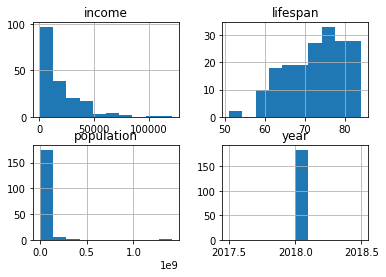

In [277]:
present.hist();

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

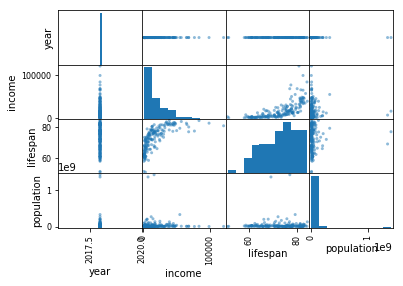

In [278]:
pd.plotting.scatter_matrix(present);

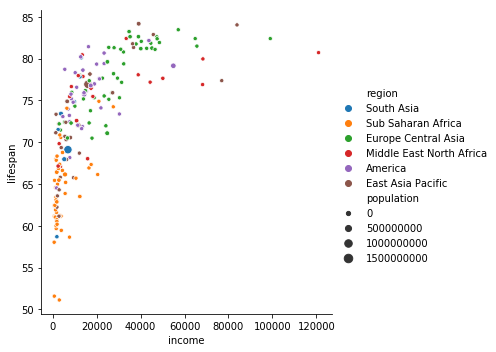

In [279]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=present);

In [280]:
present['log income'] = np.log(present['income']);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


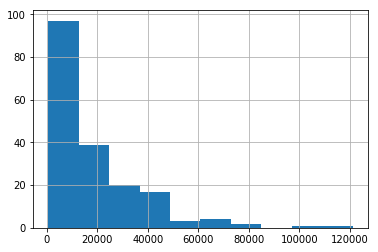

In [281]:
present.income.hist();
#distribution is skewed to the right

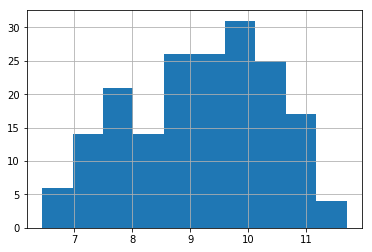

In [282]:
present['log income'].hist();

## Plot multiple years

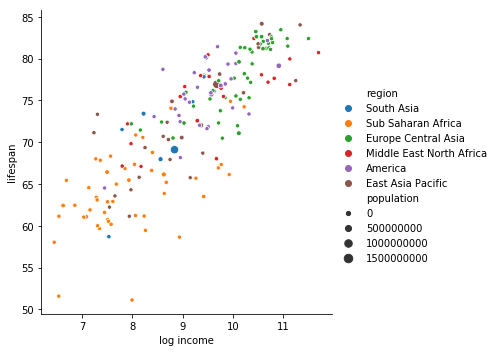

In [283]:
sns.relplot(x='log income', y='lifespan', size='population', hue='region', data=present)

In [284]:
#look at countries with highest income
present[present['log income'] >= 11].sort_values(by='log income')

,year,income,lifespan,population,name,region,log income
27296,2018,64846,82.39,5353363,Norway,Europe Central Asia,11.079771
16956,2018,65622,81.49,4803748,Ireland,Europe Central Asia,11.091666
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa,11.130654
20241,2018,68359,79.96,4197128,Kuwait,Middle East North Africa,11.132529
5521,2018,76943,77.36,434076,Brunei,East Asia Pacific,11.250820
31895,2018,83888,84.03,5791901,Singapore,East Asia Pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,Europe Central Asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,Middle East North Africa,11.703819


In [285]:
#find qatar stats
qatar = present[present['name']  == 'Qatar']
qatar_income = qatar['log income'].iloc[0]
qatar_lifespan = qatar['lifespan'].iloc[0]
print(qatar_income,qatar_lifespan)

11.703818514668283 80.71


Text(0.5, 1.0, 'Qatar has the largest GDP per capita in 2018')

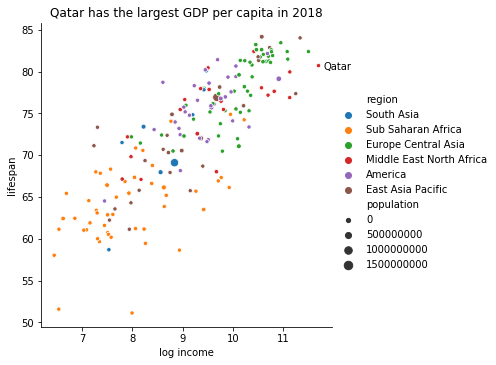

In [286]:
#Qatar plot and title
sns.relplot(x='log income', y ='lifespan', size='population', hue='region', data=present)
plt.text(x=qatar_income + 0.1, y=qatar_lifespan + -0.5, s='Qatar')
plt.title('Qatar has the largest GDP per capita in 2018')

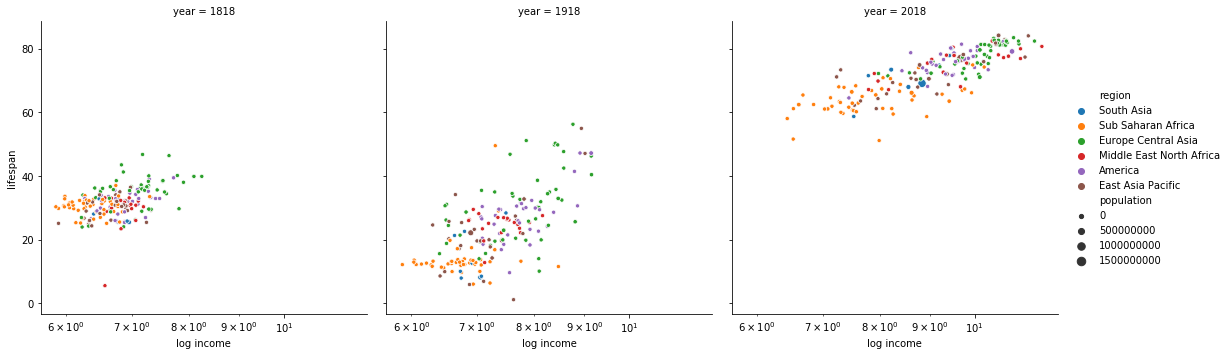

In [287]:
#get income on a log scale
df['log income'] = np.log(df['income'])

#filter df for 1818,1918,2018
years = [1818,1918,2018]
centuries = df[df['year'].isin(years)]

#plot
sns.relplot(x='log income', y='lifespan', size='population', hue='region', col='year', data=centuries)
plt.xscale('log')

## Point out a story

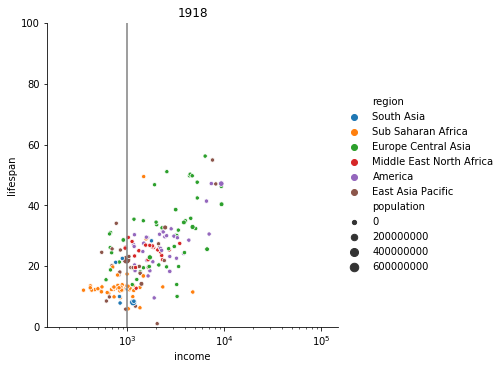

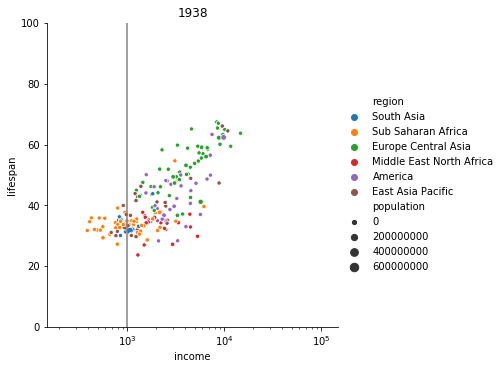

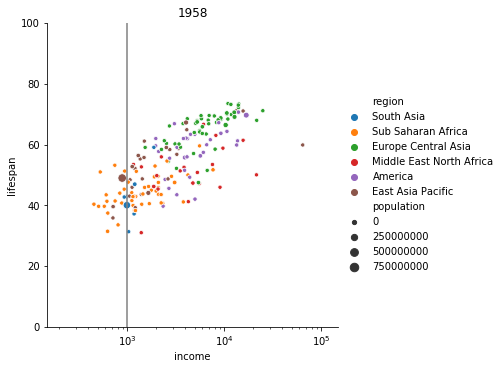

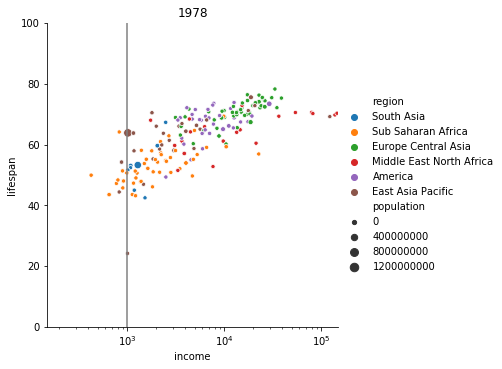

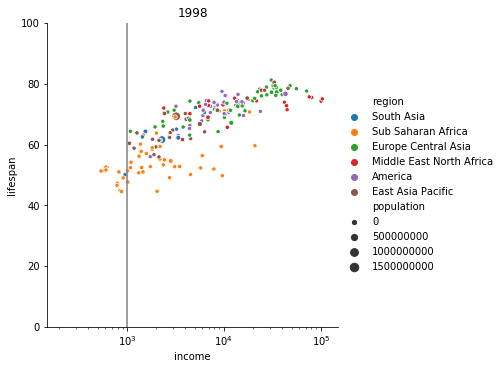

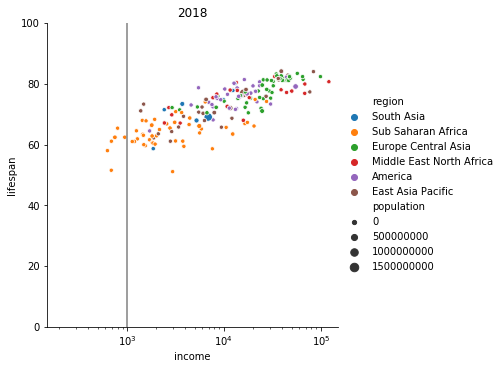

In [288]:
years = [1918, 1938, 1958, 1978, 1998, 2018]


#create plots for each year in years
for year in years:
  sns.relplot(x='income', y='lifespan', size='population', hue='region'
              , data=df[df['year'] == year])
  plt.xscale('log')
  plt.title(year)
  plt.xlim(150,150000)
  plt.ylim(0,100)
  plt.axvline(1000, color='grey')


# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project